In [1]:
# Don't change this cell; just run it. 

import numpy as np
import pandas as pd
from scipy.stats import zscore
import functools
from scipy import optimize


# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
def standard_units(arr):
    "Convert any array of numbers to standard units."
    return (arr - np.mean(arr))/np.std(arr) 

def correlation(t, label_x, label_y):
    return np.mean(standard_units(t[label_x])*standard_units(t[label_y]))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t[label_y])/np.std(t[label_x])

def intercept(t, label_x, label_y):
    return np.mean(t[label_y]) - slope(t, label_x, label_y)*np.mean(t[label_x])

def fit(t, label_x, label_y):
    """Return the height of the regression line at each x value."""
    a = slope(t, label_x, label_y)
    b = intercept(t, label_x, label_y)
    return a * t[label_x] + b

def residuals(t, label_x, label_y):
    predictions = fit(t, label_x, label_y)
    return t[label_y] - predictions

In [3]:
def calculate_residual_correlation(t, label_x, label_y):
    tb1 = t.copy()
    tb1['Fitted'] = fit(t, label_x, label_y)
    tb1['Residuals'] = residuals(t, label_x, label_y)
    return correlation(tb1, label_x, 'Residuals')

In [4]:
def calculate_avg_of_residual(t, label_x, label_y):
    tb1 = t.copy()
    tb1['Fitted'] = fit(t, label_x, label_y)
    tb1['Residuals'] = residuals(t, label_x, label_y)
    return np.mean(tb1['Residuals'])

In [5]:
def calculate_std_of_residual(t, label_x, label_y):
    tb1 = t.copy()
    tb1['Fitted'] = fit(t, label_x, label_y)
    tb1['Residuals'] = residuals(t, label_x, label_y)
    return np.std(tb1['Residuals'])

In [6]:
def plot_residuals(t, label_x, label_y):
    tb1 = t.copy()
    tb1['Fitted'] = fit(t, label_x, label_y)
    tb1['Residuals'] = residuals(t, label_x, label_y)
    fig, ax = plt.subplots(figsize=(7,6))
    tb1.plot.scatter(label_x,label_y,color='DarkBlue',ax=ax)
    tb1.plot.scatter(label_x,'Fitted',color='yellow',ax=ax)
    tb1.plot.scatter(label_x,'Residuals')  

In [7]:
def scatter_fit(table, x, y):
    
    fig, ax = plt.subplots(figsize=(7,6))

    ax.scatter(table[x], 
               table[y],  

               color='darkblue')

    #ax.plot(table[x], fit(table, x, y), lw=4, color='gold')

    x_label = x

    y_label = y

    y_vals = ax.get_yticks()

    plt.ylabel(y_label)


    plt.xlabel(x_label)

    plt.show()

In [8]:
def scatter(table, x, y):
    
    fig, ax = plt.subplots(figsize=(7,6))

    ax.scatter(table[x], 
               table[y],  

               color='darkblue')

    x_label = x

    y_label = y

    y_vals = ax.get_yticks()

    plt.ylabel(y_label)


    plt.xlabel(x_label)

    plt.show()

In [9]:
def minimize(f, start=None, smooth=False, log=None, array=False, **vargs):
    if start is None:
        assert not array, "Please pass starting values explicitly when array=True"
        arg_count = f.__code__.co_argcount
        assert arg_count > 0, "Please pass starting values explicitly for variadic functions"
        start = [0] * arg_count
    if not hasattr(start, '__len__'):
        start = [start]

    if array:
        objective = f
    else:
        @functools.wraps(f)
        def objective(args):
            return f(*args)

    if not smooth and 'method' not in vargs:
        vargs['method'] = 'Powell'
    result = optimize.minimize(objective, start, **vargs)
    if log is not None:
        log(result)
    if len(start) == 1:
        return result.x.item(0)
    else:
        return result.x

In [10]:
#Part 1a

qsar_fish_toxicity = pd.read_csv('qsar_fish_toxicity.csv')
qsar_copy = qsar_fish_toxicity.copy()

# Remove rows with missing values in the table (if there are any).

for i in range(qsar_fish_toxicity.shape[0]): #iterate over rows
    for j in range(qsar_fish_toxicity.shape[1]): #iterate over columns
        if (np.isnan(qsar_fish_toxicity.iloc[i][j])):
            df.drop(df.index[i])
            
qsar1 = qsar_copy[(qsar_copy['X1-CIC0'] > 1) & (qsar_copy['X1-CIC0'] < 5)]
qsar2 = qsar_copy[(qsar_copy['X2-SM1_Dz(Z)'] > 0) & (qsar_copy['X2-SM1_Dz(Z)'] < 2)]
qsar3 = qsar_copy[(qsar_copy['X3-GATS1i'] > 0.5) & (qsar_copy['X3-GATS1i'] < 2.5)]
qsar6 = qsar_copy[(qsar_copy['X6-MLOGP'] > -2) & (qsar_copy['X6-MLOGP'] < 6)]

qsar_copy.head(5)

,X1-CIC0,X2-SM1_Dz(Z),X3-GATS1i,X4-NdsCH,X5-NdssC,X6-MLOGP,Y-LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


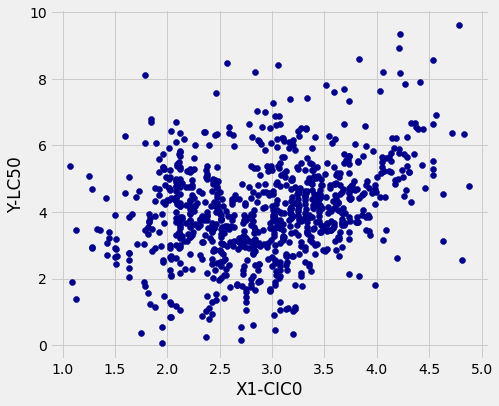

In [8]:
scatter(qsar1,'X1-CIC0','Y-LC50')

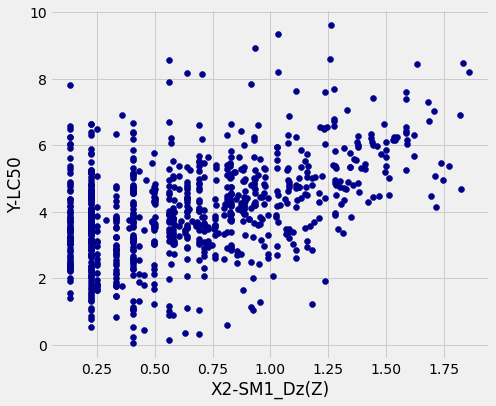

In [9]:
scatter(qsar2,'X2-SM1_Dz(Z)','Y-LC50')

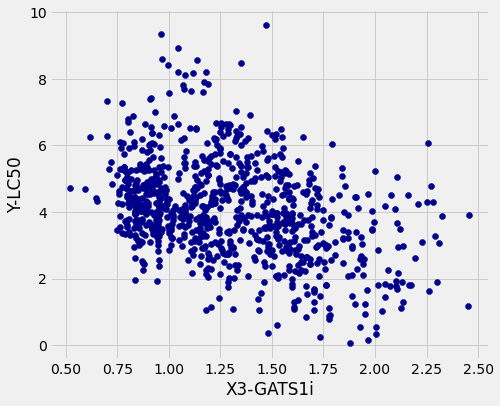

In [10]:
scatter(qsar3,'X3-GATS1i','Y-LC50')

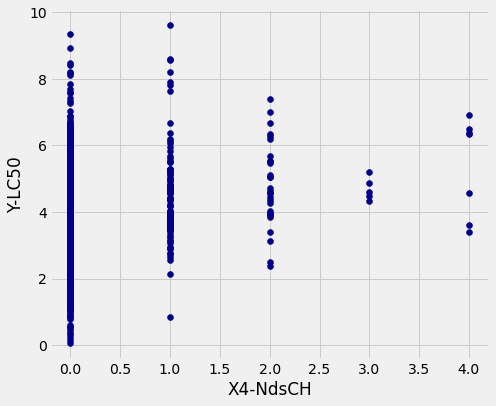

In [11]:
scatter(qsar_copy,'X4-NdsCH','Y-LC50')

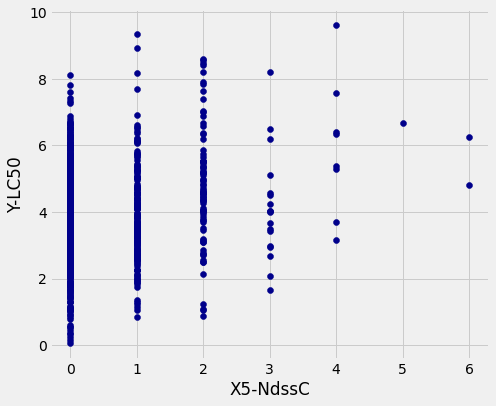

In [12]:
scatter(qsar_copy,'X5-NdssC','Y-LC50')

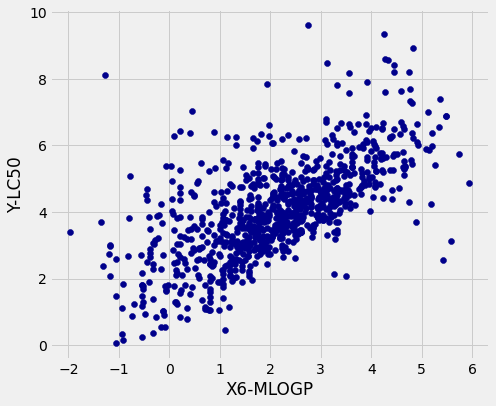

In [13]:
scatter(qsar6,'X6-MLOGP','Y-LC50')

In [14]:
def standard_units(arr):
    "Convert any array of numbers to standard units."
    return (arr - np.mean(arr))/np.std(arr) 

def correlation(t, label_x, label_y):
    return np.mean(standard_units(t[label_x])*standard_units(t[label_y]))

In [15]:
corr1 = correlation(qsar1, 'X1-CIC0', 'Y-LC50')
corr1

0.29496689067781107

In [16]:
corr2 = correlation(qsar2, 'X2-SM1_Dz(Z)', 'Y-LC50')
corr2

0.446715744619344

In [17]:
corr3 = correlation(qsar3, 'X3-GATS1i', 'Y-LC50')
corr3

-0.3737717551016086

In [18]:
corr4 = correlation(qsar_copy, 'X4-NdsCH', 'Y-LC50')
corr4

0.1720037713077081

In [19]:
corr5 = correlation(qsar_copy, 'X5-NdssC', 'Y-LC50')
corr5

0.17238969537056345

In [20]:
corr6 = correlation(qsar6, 'X6-MLOGP', 'Y-LC50')
corr6

0.6557147049104188

In [168]:
#Part 1b
correlations_arr = np.array([])
correlations_arr = np.append(correlations_arr, corr1)
correlations_arr = np.append(correlations_arr, corr2)
correlations_arr = np.append(correlations_arr, corr3)
correlations_arr = np.append(correlations_arr, corr4)
correlations_arr = np.append(correlations_arr, corr5)
correlations_arr = np.append(correlations_arr, corr6) #highest correlation

correlations_arr = np.sort(correlations_arr)[::-1]
correlations_arr

array([ 0.6557147 ,  0.44671574,  0.29496689,  0.1723897 ,  0.17200377,
       -0.37377176])

In [21]:
#part 1c

def nn_prediction(t, x_col, y_col, x_val, x_dist):
    #predicts y-value for x based on the example table,
    #using points within the neighbourhood of x_val
    neighbours = t[(t[x_col] >= (x_val-x_dist)) & (t[x_col] <= (x_val + x_dist))]
    return np.mean(neighbours[y_col])

In [22]:
predictions_nn1 = np.array([])

x_dist = 0.20
for x_val in qsar6["X6-MLOGP"]:
    predicted_y = nn_prediction(qsar6, "X6-MLOGP", "Y-LC50", x_val, x_dist)
    predictions_nn1 = np.append(predictions_nn1, predicted_y)

predictions_nn2 = np.array([])

x_dist = 1.5
for x_val in qsar6["X6-MLOGP"]:
    predicted_y = nn_prediction(qsar6, "X6-MLOGP", "Y-LC50", x_val, x_dist)
    predictions_nn2 = np.append(predictions_nn2, predicted_y)

predictions_nn3 = np.array([])
    
x_dist = 0.75
for x_val in qsar6["X6-MLOGP"]:
    predicted_y = nn_prediction(qsar6, "X6-MLOGP", "Y-LC50", x_val, x_dist)
    predictions_nn3 = np.append(predictions_nn3, predicted_y)
    
qsar6_with_nn1 = qsar6.copy()
qsar6_with_nn2 = qsar6.copy()
qsar6_with_nn3 = qsar6.copy()
qsar6_with_nn1['NN Prediction'] = predictions_nn1
qsar6_with_nn2['NN Prediction'] = predictions_nn2
qsar6_with_nn3['NN Prediction'] = predictions_nn3


In [23]:
qsar6_with_nn1.head(5)

,X1-CIC0,X2-SM1_Dz(Z),X3-GATS1i,X4-NdsCH,X5-NdssC,X6-MLOGP,Y-LC50,NN Prediction
0,3.260,0.829,1.676,0,1,1.453,3.770,3.417412
1,2.189,0.580,0.863,0,0,1.348,3.115,3.310231
2,2.125,0.638,0.831,0,0,1.348,3.531,3.310231
3,3.027,0.331,1.472,1,0,1.807,3.510,3.942368
4,2.094,0.827,0.860,0,0,1.886,5.390,3.977387


In [174]:
qsar6_with_nn2.head(5)

,X1-CIC0,X2-SM1_Dz(Z),X3-GATS1i,X4-NdsCH,X5-NdssC,X6-MLOGP,Y-LC50,NN Prediction
0,3.260,0.829,1.676,0,1,1.453,3.770,3.723888
1,2.189,0.580,0.863,0,0,1.348,3.115,3.669836
2,2.125,0.638,0.831,0,0,1.348,3.531,3.669836
3,3.027,0.331,1.472,1,0,1.807,3.510,3.858971
4,2.094,0.827,0.860,0,0,1.886,5.390,3.910344


In [175]:
qsar6_with_nn3.head(5)

,X1-CIC0,X2-SM1_Dz(Z),X3-GATS1i,X4-NdsCH,X5-NdssC,X6-MLOGP,Y-LC50,NN Prediction
0,3.260,0.829,1.676,0,1,1.453,3.770,3.543113
1,2.189,0.580,0.863,0,0,1.348,3.115,3.503766
2,2.125,0.638,0.831,0,0,1.348,3.531,3.503766
3,3.027,0.331,1.472,1,0,1.807,3.510,3.784882
4,2.094,0.827,0.860,0,0,1.886,5.390,3.847195


<AxesSubplot:xlabel='X6-MLOGP', ylabel='NN Prediction'>

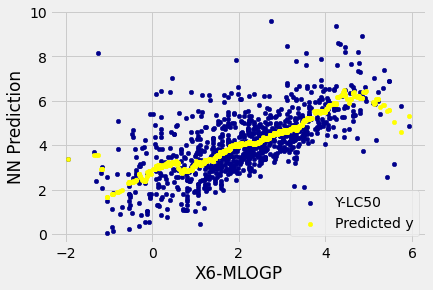

In [25]:
ax = qsar6_with_nn1.plot.scatter('X6-MLOGP','Y-LC50', color='DarkBlue', label='Y-LC50')
qsar6_with_nn1.plot.scatter('X6-MLOGP', 'NN Prediction', color='Yellow', label='Predicted y', ax=ax)

In [36]:
qsar6_with_predictions = qsar6_with_nn1.copy()
qsar6_with_predictions['Regression Prediction'] = fit(qsar6,'X6-MLOGP','Y-LC50')
qsar6_with_predictions.head(5)

,X1-CIC0,X2-SM1_Dz(Z),X3-GATS1i,X4-NdsCH,X5-NdssC,X6-MLOGP,Y-LC50,NN Prediction,Regression Prediction
0,3.260,0.829,1.676,0,1,1.453,3.770,3.417412,3.618429
1,2.189,0.580,0.863,0,0,1.348,3.115,3.310231,3.546795
2,2.125,0.638,0.831,0,0,1.348,3.531,3.310231,3.546795
3,3.027,0.331,1.472,1,0,1.807,3.510,3.942368,3.859938
4,2.094,0.827,0.860,0,0,1.886,5.390,3.977387,3.913834


In [26]:
def rmse(slope, intercept, t, x_col, y_col):
    x = t[x_col]
    y = t[y_col]
    estimate = slope * x + intercept
    return (np.mean((y-estimate) ** 2)) ** 0.5

In [32]:
qsar6_fit = qsar6.copy()
best_line = minimize(lambda par1, par2: rmse(par1, par2, qsar6, 'X6-MLOGP', 'Y-LC50'))
linear_fit = np.array(best_line[0] * qsar6['X6-MLOGP'] + best_line[1])
qsar6_fit['Linear Fit'] = linear_fit
qsar6_fit.head(5)

,X1-CIC0,X2-SM1_Dz(Z),X3-GATS1i,X4-NdsCH,X5-NdssC,X6-MLOGP,Y-LC50,Linear Fit
0,3.260,0.829,1.676,0,1,1.453,3.770,3.618429
1,2.189,0.580,0.863,0,0,1.348,3.115,3.546795
2,2.125,0.638,0.831,0,0,1.348,3.531,3.546795
3,3.027,0.331,1.472,1,0,1.807,3.510,3.859938
4,2.094,0.827,0.860,0,0,1.886,5.390,3.913834


<AxesSubplot:xlabel='X6-MLOGP', ylabel='Regression Prediction'>

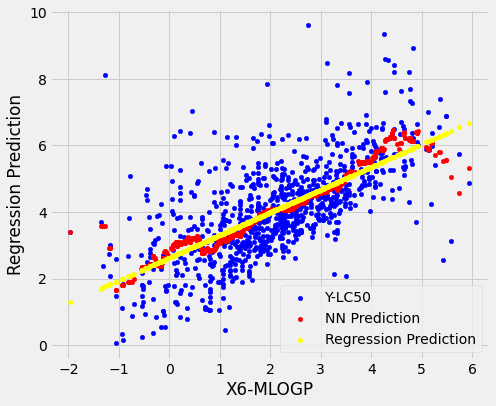

In [38]:
fig, ax = plt.subplots(figsize=(7,6))
qsar6_with_predictions.plot.scatter('X6-MLOGP','Y-LC50', color='blue', label='Y-LC50', ax=ax)
qsar6_with_predictions.plot.scatter('X6-MLOGP','NN Prediction', color='red', label='NN Prediction', ax=ax)
qsar6_with_predictions.plot.scatter('X6-MLOGP','Regression Prediction', color='yellow', label='Regression Prediction', ax=ax)

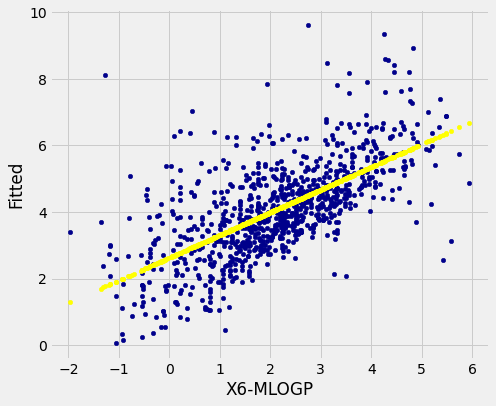

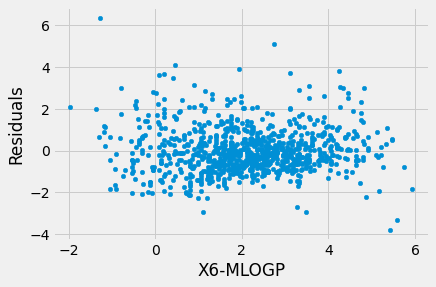

In [198]:
plot_residuals(qsar6_with_predictions, 'X6-MLOGP','Y-LC50')

In [62]:
residual_correlation = calculate_residual_correlation(qsar6_with_predictions, 'X6-MLOGP','Y-LC50')
residual_correlation

-1.454367545340449e-15

In [64]:
residual_average = calculate_avg_of_residual(qsar6_with_predictions, 'X6-MLOGP','Y-LC50')
residual_average

2.9146431511223623e-15

In [66]:
residual_std = calculate_std_of_residual(qsar6_with_predictions, 'X6-MLOGP','Y-LC50')
residual_std

1.094374308417557

In [71]:
fraction_val = np.sqrt(1-corr6**2) * np.std(qsar6['Y-LC50'])
fraction_val

1.094374308417557

In [11]:
#part 1d

def euclidean_distance(arr1, arr2):
    return np.sqrt(sum((arr1-arr2)**2))

In [12]:
def distances(y_col, training, example):
    """
    Compute distance between example and every row in training set.
    Return the training set augmented with a distance column
    """    
    distances = np.array([])
    attributes_only = training.copy().drop(columns=[y_col])

    for row in np.arange(len(attributes_only)):
        distances = np.append(distances, euclidean_distance(attributes_only.iloc[row,:], example))

    training['Distance_to_ex'] = distances
    
    return training

In [13]:
def closest(y_col, training, example, k):
    """
    Return a table of the k closest neighbors to the example
    """
    return distances(y_col, training, example).sort_values(by=['Distance_to_ex'], kind='mergesort').take(np.arange(k))

In [14]:
def average_outcome(y_col, topk):
    return np.mean(topk[y_col])

In [15]:
def KNN_model(y_col, training, test, k):
    return average_outcome(y_col, closest(y_col, training, test, k))

In [16]:
def KNN_evaluate_accuracy(y_col, training, test, k):
    test_attributes = test.copy().drop(columns=[y_col])
    prediction = np.array([])
    
    num_correct = 0
    
    for i in np.arange(len(test)):
        c = KNN_model(y_col, training, test_attributes.iloc[i,:],k)
        prediction = np.append(prediction, c)
        training.drop(columns=["Distance_to_ex"], inplace=True)
    
    residual = test[y_col] - prediction
    return np.mean(residual**2)

In [28]:
multiple = pd.DataFrame({'X6-MLOGP':qsar6["X6-MLOGP"],
                            'X2-SM1_Dz(Z)':qsar6["X2-SM1_Dz(Z)"],
                            'Y-LC50':qsar6["Y-LC50"]})

multiple = multiple[(multiple['X2-SM1_Dz(Z)'] > 0) & (multiple['X2-SM1_Dz(Z)'] < 2)]
shuffled = multiple.sample(len(multiple), replace=False)
training_set = multiple.iloc[0:432,:].copy()
test_set = multiple.iloc[432:864,:].copy()

In [44]:
KNN_evaluate_accuracy("Y-LC50", multiple, multiple, 5)

0.7245508550925932

In [45]:
KNN_evaluate_accuracy("Y-LC50", multiple, multiple, 3)

0.5903214750514404

In [46]:
KNN_evaluate_accuracy("Y-LC50", multiple, multiple, 11)

0.8607818690503528

In [47]:
KNN_evaluate_accuracy("Y-LC50", multiple, multiple, 1)

0.1665344722222223

In [48]:
multiple2 = pd.DataFrame({'X6-MLOGP':qsar6["X6-MLOGP"],
                            'X1-CIC0':qsar6["X1-CIC0"],
                            'Y-LC50':qsar6["Y-LC50"]})

multiple2 = multiple2[(multiple2['X1-CIC0'] > 1) & (multiple2['X1-CIC0'] < 5)]

In [49]:
KNN_evaluate_accuracy("Y-LC50", multiple2, multiple2, 1)

0.16172226681614352

In [50]:
KNN_evaluate_accuracy("Y-LC50", multiple2, multiple2, 3)

0.6713259692326856

In [51]:
KNN_evaluate_accuracy("Y-LC50", multiple2, multiple2, 5)

0.8537751692825124

In [52]:
KNN_evaluate_accuracy("Y-LC50", multiple2, multiple2, 11)

1.0122420333636

In [18]:
multiple3 = pd.DataFrame({'X1-CIC0':qsar1["X1-CIC0"],
                            'X2-SM1_Dz(Z)':qsar1["X2-SM1_Dz(Z)"],
                            'Y-LC50':qsar1["Y-LC50"]})

multiple3 = multiple3[(multiple3['X2-SM1_Dz(Z)'] > 0) & (multiple3['X2-SM1_Dz(Z)'] < 2)]

In [19]:
KNN_evaluate_accuracy("Y-LC50", multiple3, multiple3, 1)

0.2842061445221446

In [20]:
KNN_evaluate_accuracy("Y-LC50", multiple3, multiple3, 3)

0.7179194199689204

In [21]:
KNN_evaluate_accuracy("Y-LC50", multiple3, multiple3, 5)

0.9341953696037303

In [22]:
KNN_evaluate_accuracy("Y-LC50", multiple3, multiple3, 11)

1.1098712215704405

In [23]:
#cost function

def multiple_regression_rmse(var1_coef, var2_coef, intercept, t, x1_col, x2_col, y_col):
    var1 = t[x1_col]
    var2 = t[x2_col]
    y = t[y_col]
    prediction = (var1_coef * var1) + (var2_coef * var2) + intercept
    mse = np.mean((y - prediction) ** 2)
    return np.sqrt(mse)

In [54]:
best = minimize(lambda par1, par2, par3 :multiple_regression_rmse(par1, par2, par3, multiple, "X6-MLOGP", "X2-SM1_Dz(Z)", "Y-LC50"))
best

array([0.61305859, 1.07010433, 2.09576898])

In [55]:
multiple_regression_rmse(best.item(0),best.item(1),best.item(2), multiple, "X6-MLOGP", "X2-SM1_Dz(Z)", "Y-LC50")

1.017831002171727

In [56]:
best2 = minimize(lambda par1, par2, par3 :multiple_regression_rmse(par1, par2, par3, multiple2, "X6-MLOGP", "X1-CIC0", "Y-LC50"))
best2

array([ 6.89676625e-01, -2.28405039e-03,  2.60894887e+00])

In [57]:
multiple_regression_rmse(best2.item(0),best2.item(1),best2.item(2), multiple2, "X6-MLOGP", "X1-CIC0", "Y-LC50")

1.0928081934665974

In [24]:
best3 = minimize(lambda par1, par2, par3 :multiple_regression_rmse(par1, par2, par3, multiple3, "X1-CIC0", "X2-SM1_Dz(Z)", "Y-LC50"))
best3

array([0.81461863, 1.93163814, 0.44090081])

In [25]:
multiple_regression_rmse(best3.item(0),best3.item(1),best3.item(2), multiple3, "X1-CIC0", "X2-SM1_Dz(Z)", "Y-LC50")

1.1793458358394997

In [58]:
#part 1e
#simple regression

np.mean(qsar6['X6-MLOGP'])

2.1101441241685164

In [19]:
def prediction_at(t,x,y,x_value):
    return slope(t,x,y) * x_value + intercept(t,x,y)

In [20]:
def bootstrap_prediction(t, x, y, new_x, repetitions=1000):

    # Bootstrap the scatter, predict, collect
    predictions = np.array([])
    
    for i in np.arange(repetitions):
        resample = t.sample(len(t), replace=True)
        predicted_y = prediction_at(resample, x, y, new_x)
        predictions = np.append(predictions, predicted_y)

    # Find the ends of the approximate 96% prediction interval
    left = np.percentile(predictions, 2)
    right = np.percentile(predictions, 98)

    # Display results
    pd.DataFrame({'Prediction':predictions}).hist(bins=20, ec='black')
    
    plt.xlabel('predictions at x='+str(new_x))
    plt.plot([left, right], [0, 0], color='yellow', lw=8);
    print('Approximate 96%-confidence interval for height of true line:')
    print(left, right, '(width =', right - left, ')')

Approximate 96%-confidence interval for height of true line:
1.7081934224476514 2.186118006138981 (width = 0.4779245836913295 )


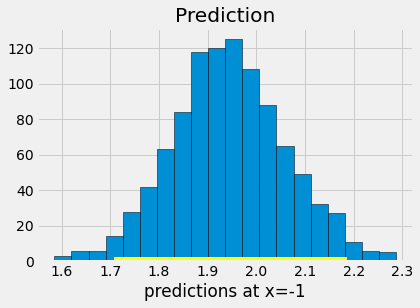

In [59]:
bootstrap_prediction(qsar6, "X6-MLOGP", "Y-LC50", -1)

Approximate 96%-confidence interval for height of true line:
3.918182951172324 4.071786232307146 (width = 0.15360328113482247 )


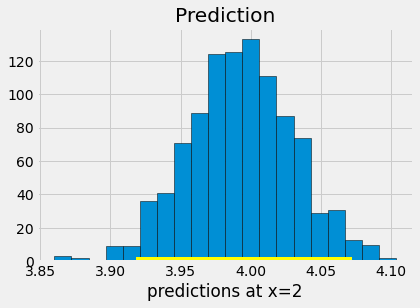

In [60]:
bootstrap_prediction(qsar6, "X6-MLOGP", "Y-LC50", 2)

In [26]:
a = slope(qsar6, "X6-MLOGP", "Y-LC50")
b = intercept(qsar6, "X6-MLOGP", "Y-LC50")
pred_at_2 = a * 2 + b
pred_at_2

3.991608099168129

Approximate 96%-confidence interval for height of true line:
4.589563191962934 4.7626824710969435 (width = 0.17311927913400993 )


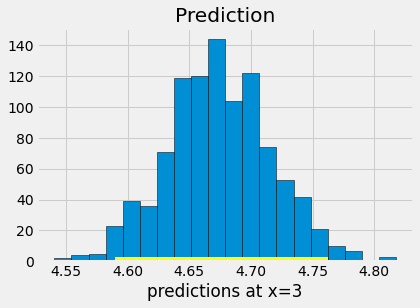

In [61]:
bootstrap_prediction(qsar6, "X6-MLOGP", "Y-LC50", 3)

Approximate 96%-confidence interval for height of true line:
5.84951184968616 6.245434040979755 (width = 0.39592219129359485 )


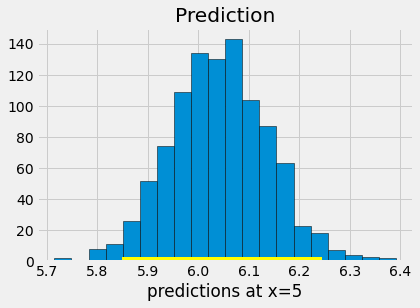

In [62]:
bootstrap_prediction(qsar6, "X6-MLOGP", "Y-LC50", 5)

In [63]:
#multiple regression

def prediction_at_both(t, x1, x2, y, x1_value, x2_value):
    coef = minimize(lambda par1, par2, par3 :multiple_regression_rmse(par1, par2, par3,t,x1,x2,y))
    
    return (coef.item(0) * x1_value) + (coef.item(1) * x2_value) + coef.item(2)

In [64]:
def bootstrap_prediction_both(t, x1, x2, y, new_x1, new_x2, repetitions=1000):

    # Bootstrap the scatter, predict, collect
    predictions = np.array([])
    
    for i in np.arange(repetitions):
        resample = t.sample(len(t), replace=True)
        predicted_y = prediction_at_both(resample, x1, x2, y, new_x1, new_x2)
        predictions = np.append(predictions, predicted_y)

    # Find the ends of the approximate 96% prediction interval
    left = np.percentile(predictions, 2)
    right = np.percentile(predictions, 98)

    # Display results
    pd.DataFrame({'Prediction':predictions}).hist(bins=20, ec='black')
    
    plt.xlabel('predictions at x1='+str(new_x1) + ', x2=' +str(new_x2))
    plt.plot([left, right], [0, 0], color='yellow', lw=8);
    print('Approximate 96%-confidence interval for height of true line:')
    print(left, right, '(width =', right - left, ')')

Approximate 96%-confidence interval for height of true line:
4.904395308351189 5.114084776459953 (width = 0.2096894681087642 )


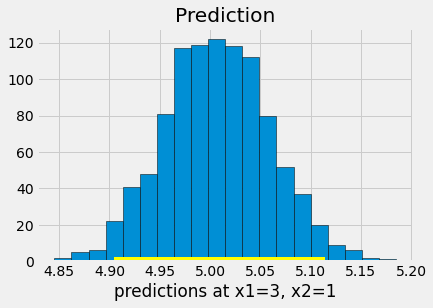

In [65]:
bootstrap_prediction_both(multiple, "X6-MLOGP", "X2-SM1_Dz(Z)", "Y-LC50", 3, 1)

In [30]:
pred_at_31 = (0.61305859 * 3) + (1.07010433 * 1) + 2.09576898
pred_at_31

5.005049079999999